#### Import Numpy - Pandas - Matplotlib

In [198]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [199]:
np.version.version

'1.23.4'

In [200]:
pd.__version__

'1.5.1'

#### Leggere il CSV dal DataSet (csv) originale

In [201]:
df = pd.read_csv('CSV/pokedex_(Update_05.20).csv', index_col=0)

#### Mostrare il DataSet appena importato

In [202]:
df

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,NaN,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,Steel,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,NaN,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


#### Selezionare ed eliminare le colonne che NON volgio avere nel mio DataSet

In [203]:
col_names = [
    'pokedex_number', 'name', 'generation',
    'status', 'type_number', 'type_1',
    'type_2', 'height_m', 'weight_kg',
    'abilities_number', 'ability_1', 'ability_2',
    'ability_hidden', 'total_points', 'hp',
    'attack', 'defense', 'sp_attack',
    'sp_defense', 'speed', 'catch_rate',
    'base_experience', 'percentage_male'
]

In [204]:
filtered_pokemon_data = pd.DataFrame(df, columns=col_names)

In [205]:
filtered_pokemon_data

,pokedex_number,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male
0,1,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,2,...,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5
1,2,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,2,...,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5
2,3,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,2,...,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5
3,3,Mega Venusaur,1,Normal,2,Grass,Poison,2.4,155.5,1,...,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5
4,4,Charmander,1,Normal,1,Fire,NaN,0.6,8.5,2,...,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,8,Legendary,1,Fairy,NaN,2.8,110.0,1,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1024,889,Zamazenta Crowned Shield,8,Legendary,2,Fighting,Steel,2.9,785.0,1,...,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN
1025,889,Zamazenta Hero of Many Battles,8,Legendary,1,Fighting,NaN,2.9,210.0,1,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1026,890,Eternatus,8,Legendary,2,Poison,Dragon,20.0,950.0,1,...,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN


#### Aggiungo una colonna con gli anni in relazione alla generazione 
- La prima uscii nel 1996
- La secona uscii nel 1999
- La terza uscii nel 2002
- La quarta uscii nel 2006
- La quinta uscii nel 2010
- La sesta uscii nel 2013
- La settima uscii nel 2016
- L' ottava uscii nel 2019

##### Prendo da un altro DataSet UNA colonna che mi interessa
##### Unisco i due DataSet in uno nuovo esportato in CSV

In [206]:
# Linking genreration number to publish date (JP)
years = [1996, 1999, 2002, 2006, 2010, 2013, 2016, 2019]

# inserisco la colonna (sarà la 3°) che si chiamerà date_published passandoli come valore il mapping dato dal
# dizionario creato con enumerate (con lista di anni e index)
filtered_pokemon_data.insert(2, column='date_published', value=filtered_pokemon_data.generation.map(dict(enumerate(years, start=1))))

df_2 = pd.read_csv('CSV/All_Pokemon.csv', index_col=0)
df_2.reset_index(inplace=True)
df_3 = pd.DataFrame(df_2['Experience to level 100'])
filtered_pokemon_data = pd.merge(filtered_pokemon_data, df_3, left_on=filtered_pokemon_data.index, right_index=True)


# filtered_pokemon_data
# filtered_pokemon_data.insert(22, column='experience_to_100', value=experience_to_100[''])

filtered_pokemon_data.to_csv('CSV/filtered_pokemon_data_years.csv', index=False)



# filtered_pokemon_data

#### sostituisci counter
#### Rappresentazione con grafico a barre di quanti Pokémon sono stati rilasciati per ogni generazione

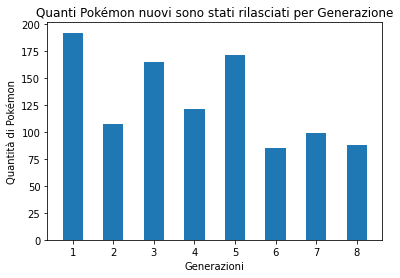

In [207]:
# vogliamo rappresentare quanti Pokémon sono stati rilasciati per ogni generazione, in questo caso 8,
from collections import Counter

generations = filtered_pokemon_data.generation.values.tolist()
generations = Counter(generations)
plt.title("Quanti Pokémon nuovi sono stati rilasciati per Generazione")
plt.xlabel('Generazioni')
plt.ylabel('Quantità di Pokémon')
plt.bar(generations.keys(), generations.values(), width=0.5,)
plt.show()

#### Grafico che mostra quante aggiunte di nuovi Pokémon ci sono state in ogni generazione (il punto 0 è 192 Pokémon della gen 1)
#### RIFINIRE LA LABLE (QUESTO GRAFICO NON VUOL DIRE UN CAZZO)

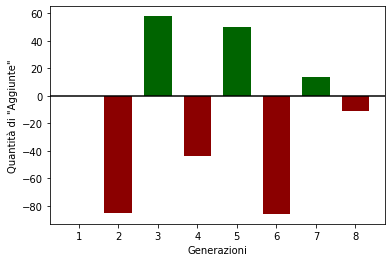

In [208]:
pippo_franco = list(generations.values())
pippo_franco.insert(0, pippo_franco[0])

result = [y - x for x, y in zip(pippo_franco, pippo_franco[1:])]


colors =[]
[colors.append('darkgreen') if r > 0 else colors.append('darkred') for r in result]

plt.bar(generations.keys(), result, width=0.7, color=colors)
plt.axhline(y=0, color='black')
plt.xlabel("Generazioni")
plt.ylabel('Quantità di "Aggiunte"')
plt.show()

# si evince come nelle genereazioni "dispari", prendendo come punto 0 il numero di Pokémon
# della generazione 1, si abbia un maggior incremento di Pokémon rispetto alle generazioni "pari"

In [209]:
generations

Counter({1: 192, 2: 107, 3: 165, 4: 121, 5: 171, 6: 85, 7: 99, 8: 88})

#### Mettiamo a confronto l'incremento generazionale di Pokémon con quanti sono stati effettivamente aggiunti per generazione

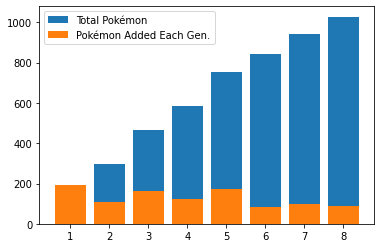

In [210]:
# Mettiamo a confronto l'incremento generazionale di Pokémon con quanti sono stati effettivamente
# aggiunti per generazione

pkmn_x_generation = pd.Series(generations.values())

total_pkmn_gen_to_gen = [pd.Series(list(generations.values())[:i]).sum() for i in generations.keys()]

plt.bar(generations.keys(),total_pkmn_gen_to_gen)
plt.bar(generations.keys(), generations.values())
plt.legend(['Total Pokémon', 'Pokémon Added Each Gen.'])
plt.show()

In [211]:
filtered_pokemon_data

,key_0,pokedex_number,name,date_published,generation,status,type_number,type_1,type_2,height_m,...,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male,Experience to level 100
0,0,1,Bulbasaur,1996,1,Normal,2,Grass,Poison,0.7,...,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5,1059860
1,1,2,Ivysaur,1996,1,Normal,2,Grass,Poison,1.0,...,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5,1059860
2,2,3,Venusaur,1996,1,Normal,2,Grass,Poison,2.0,...,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5,1059860
3,3,3,Mega Venusaur,1996,1,Normal,2,Grass,Poison,2.4,...,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5,1059860
4,4,4,Charmander,1996,1,Normal,1,Fire,NaN,0.6,...,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5,1059860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1023,888,Zacian Hero of Many Battles,2019,8,Legendary,1,Fairy,NaN,2.8,...,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,1250000
1024,1024,889,Zamazenta Crowned Shield,2019,8,Legendary,2,Fighting,Steel,2.9,...,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,1250000
1025,1025,889,Zamazenta Hero of Many Battles,2019,8,Legendary,1,Fighting,NaN,2.9,...,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,1250000
1026,1026,890,Eternatus,2019,8,Legendary,2,Poison,Dragon,20.0,...,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,1250000


#### Ricerchiamo qual è il Tipo Primario più comune tra:
- Normale
- Volante
- Elettro
- Fuoco
- Acqua
- Erba
- Lotta
- Veleno
- Spettro
- Roccia
- Terra
- Coleottero
- Psico
- Acciaio
- Ghiaccio
- Buio
- Drago

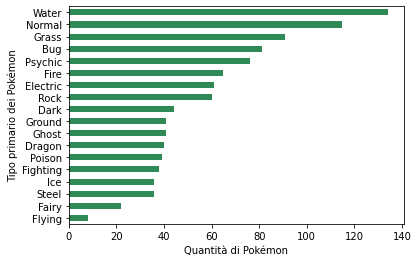

In [212]:
pokemon_for_type = filtered_pokemon_data.groupby("type_1")["name"].count()
pokemon_for_type_sorted = pokemon_for_type.sort_values(ascending=True).plot(kind="barh", color= 'seagreen')

plt.ylabel('Tipo primario dei Pokémon')
plt.xlabel('Quantità di Pokémon')

plt.show()

# Si evince come il tipo dominante di pokemon è il tipo Acqua, per un team ottimale, avere un tipo "Elettro", 
# in media aumenta la probabilità di vincere 

#### Ricerchiamo qual è il Tipo Secondario più comune tra:
- Normale
- Volante
- Elettro
- Fuoco
- Acqua
- Erba
- Lotta
- Veleno
- Spettro
- Roccia
- Terra
- Coleottero
- Psico
- Acciaio
- Ghiaccio
- Buio
- Drago

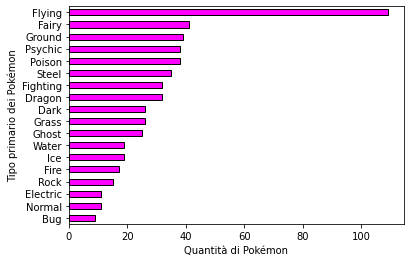

In [213]:
pokemon_for_type_2 = filtered_pokemon_data.groupby("type_2")['name'].count()
pokemon_for_type_2_sorted = pokemon_for_type_2.sort_values(ascending=True).plot(kind="barh", color='fuchsia', edgecolor='black')

plt.ylabel('Tipo primario dei Pokémon')
plt.xlabel('Quantità di Pokémon')

plt.show()

# il tipo secondario più comune è il tipo volante, che tra l'altro è il tipo primario meno diffuso

#### Ricerchiamo il Pokémon più leggero
##### Il peso minimo imposto da The Poekomon Company in KG è 0.1kg 

In [214]:
# get lightest
lightest = filtered_pokemon_data[['name', 'weight_kg']].sort_values(by = ['weight_kg'], ascending=True)

series1 = pd.DataFrame(
    {'Pokémon': lightest['name'], 'Peso KG': lightest['weight_kg'].values})
# only_lightest = series1[series1['Peso KG'] < 0.2]
only_lightest = series1[:1]
only_lightest

# ci sono 5 Pokémon che pesano 0.1 (valore minimo nel "mondo" Pokémon)
# Prendo il primo tramite sliceing

,Pokémon,Peso KG
776,Flabébé,0.1


#### Ricerchiamo il Pokémon più pesante
##### Il peso massimo imposto da The Pokémon Company in KG è 999.9kg 

In [215]:
# get the heaviest
heaviest = filtered_pokemon_data[['name', 'weight_kg']].sort_values(by = ['weight_kg'], ascending=False)

series2 = pd.DataFrame(
    {'Pokémon': heaviest['name'], 'Peso KG': heaviest['weight_kg'].values})
# only_heaviest = series2[series2['Peso KG'] > 999.8]
only_heaviest = series2[:1]
only_heaviest

# Ci sono 2 Pokémon che pesano 999.9 (valore massimo nel "mondo" Pokémon)
# Prendo il primo tramite sliceing

,Pokémon,Peso KG
924,Celesteela,999.9


#### Rierchiamo il Pokémon più veloce

In [216]:
# get the fastest
fastest = filtered_pokemon_data[['name', 'speed']].sort_values(by = ['speed'], ascending=False)
series3 = pd.DataFrame(
    {'Pokémon': fastest['name'], 'Velocità': fastest['speed'].values})
only_fastest = series3[:1]
only_fastest

,Pokémon,Velocità
463,Deoxys Speed Forme,180.0


#### Ricerchiamo il Pokémon più alto
##### L'altezza massima imposta da The Pokémon Company in m è 100.00m 

In [217]:
# get the tallest
tallest = filtered_pokemon_data[['name', 'height_m']].sort_values(by = ['height_m'], ascending=False)
series4 = pd.DataFrame(
    {'Pokémon': tallest['name'], 'Altezza in m': tallest['height_m'].values})
# only_tallest = series4[series4['height_m'] > 99.9]
only_tallest = series4[:1]
only_tallest

,Pokémon,Altezza in m
1027,Eternatus Eternamax,100.0


#### Ricerchiamo il Pokémon più basso
##### L'altezza minima imposta da The Pokémon Company in m è 0.1m 

In [218]:
# get the smallest
smallest = filtered_pokemon_data[['name', 'height_m']].sort_values(by = ['height_m'], ascending=True)
series5 = pd.DataFrame(
    {'Pokémon': smallest['name'], 'Altezza in m': smallest['height_m'].values})
# only_smallest = series5[series5['height_m'] < 0.2]
only_smallest = series5[:1]
only_smallest

# ci sono 6 Pokémon che hanno la stessa altezza (0.1 valore minimo nel "mondo" Pokémon
# prendo il primo tramite sliceing

,Pokémon,Altezza in m
864,Cutiefly,0.1


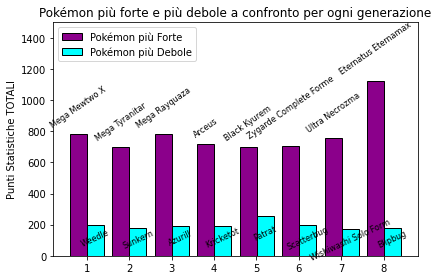

In [219]:
from itertools import chain
sorted_by_gen_and_total_points = filtered_pokemon_data.sort_values(by=['generation', 'total_points'], ascending=[True, False])

my_dict = dict((k, 
                [
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['total_points'].head(1).values),
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['total_points'].tail(1).values)
                ]
                ) for k in sorted_by_gen_and_total_points['generation'].unique())

my_labels = dict((k, 
                [
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['name'].head(1).values),
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['name'].tail(1).values)
                ]
                ) for k in sorted_by_gen_and_total_points['generation'].unique())


my_s = pd.Series(my_dict)
my_l = pd.Series(my_labels)

temp_b = []
temp_w = []
temp_b_l = []
temp_w_l = []
best1 = [temp_b + [my_s[i][0]] for i in my_dict.keys()]
worst1 = [temp_w + [my_s[i][1]] for i in my_dict.keys()]
best_labels = [temp_b_l + [my_l[i][0]] for i in my_dict.keys()]
worst_labels = [temp_w_l + [my_l[i][1]] for i in my_dict.keys()]


# unpacco tramite chain la lista degli elementi in best e worst label e li concateno in una lista unica
# DA [['Mega Mewtwo X'], ['Mega Tyranitar'], ['Mega Rayquaza'], ['Arceus'], ['Black Kyurem'], ['Zygarde Complete Forme'], ['Ultra Necrozma'], ['Eternatus Eternamax']]
# A ['Mega Mewtwo X', 'Mega Tyranitar', 'Mega Rayquaza', 'Arceus', 'Black Kyurem', 'Zygarde Complete Forme', 'Ultra Necrozma', 'Eternatus Eternamax']

best_label_unpacked = list(chain(*best_labels))
worst_label_unpacked = list(chain(*worst_labels))

# -----GROUPED BAR CHART-----

col_width = 0.4
# prima barra è l'asse x (con le generazioni)
bar1 = np.arange(len(best1))+1

# da dove parte la barra 2 --> sommi alla posizione della prima colonna la larghezza della prima colonna
# posizione dove disegnare la colonna 2
bar2 = [i + col_width for i in bar1]

# creo separatamente le 2 barre per il grafico:
fig, ax = plt.subplots()
rects1 = ax.bar(bar1, [best1[i][0] for i in range(len(best1))], col_width,
                label='Pokémon più GRANDI', color='darkmagenta', edgecolor='black')
rects2 = ax.bar(bar2, [worst1[i][0] for i in range(len(best1))], col_width,
                label='Pokémon più PICCOLO', color='aqua', edgecolor='black')

ax.set_ylabel('Punti Statistiche TOTALI')
ax.set_title('Pokémon più forte e più debole a confronto per ogni generazione')
ax.set_xticks(bar1 + col_width/2.07, bar1)
ax.legend(["Pokémon più Forte", "Pokémon più Debole"], loc='upper left')
ax.set_ylim(0,1500)

ax.bar_label(rects1, labels=best_label_unpacked, padding=5, fontsize=8, rotation=35)
ax.bar_label(rects2, labels=worst_label_unpacked,
             padding=3, fontsize=8, label_type='center', rotation=25)
fig.tight_layout()
plt.show()

# plt.bar(bar1, [best1[i][0] for i in range(len(best1))], col_width,
#         label='Pokémon più GRANDI', color='darkmagenta', edgecolor='black')
# plt.bar(bar2, [worst1[i][0] for i in range(len(best1))], col_width,
#         label='Pokémon più PICCOLO', color='aqua', edgecolor='black')
# serve a dare un offset ai numeri nell'asse x
# plt.xticks(bar1 + col_width/2.1, bar1)
# plt.xlabel("Generazione")
# plt.ylabel("Punti Statistiche TOTALI")
# plt.legend(["Pokémon più Forte", "Pokémon più Debole"])

##### Tutti i tentativi fatti per rendere parametrizzato il grafico

In [220]:
# ---------------------------
# ---------------------------
# ---------------------------
# ---------------------------
# TUTTI I TRY FATTI

# Non era molto conveniente e per niente pythonico
# only_gen_1 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 1]
# only_gen_2 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 2]
# only_gen_3 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 3]
# only_gen_4 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 4]
# only_gen_5 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 5]
# only_gen_6 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 6]
# only_gen_7 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 7]
# only_gen_8 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 8]

# l_1 = list(only_gen_1['total_points'].head(1).values)
# l_2 = list(only_gen_2['total_points'].head(1).values)
# l_3 = list(only_gen_3['total_points'].head(1).values)
# l_4 = list(only_gen_4['total_points'].head(1).values)
# l_5 = list(only_gen_5['total_points'].head(1).values)
# l_6 = list(only_gen_6['total_points'].head(1).values)
# l_7 = list(only_gen_7['total_points'].head(1).values)
# l_8 = list(only_gen_8['total_points'].head(1).values)

# w_1 = list(only_gen_1['total_points'].tail(1).values)
# w_2 = list(only_gen_2['total_points'].tail(1).values)
# w_3 = list(only_gen_3['total_points'].tail(1).values)
# w_4 = list(only_gen_4['total_points'].tail(1).values)
# w_5 = list(only_gen_5['total_points'].tail(1).values)
# w_6 = list(only_gen_6['total_points'].tail(1).values)
# w_7 = list(only_gen_7['total_points'].tail(1).values)
# w_8 = list(only_gen_8['total_points'].tail(1).values)


# best_worst = pd.DataFrame
# a = list(my_dict.values()[i][0])
# print(list(my_dict.values()))
# print(list(my_dict.values())[1][0])
# best = [my_s[1][0], my_s[2][0], my_s[3][0],my_s[4][0], my_s[5][0], my_s[6][0], my_s[7][0], my_s[8][0]]
# for i in range(my_s.index):
#     best = best + [my_s[i][0]]
# best = [
#     my_s[1][0], my_s[2][0], my_s[3][0], my_s[4][0],
#     my_s[5][0], my_s[6][0], my_s[7][0], my_s[8][0]
# ]
# worst = [
#     my_s[1][1], my_s[2][1], my_s[3][1], my_s[4][1],
#     my_s[5][1], my_s[6][1], my_s[7][1], my_s[8][1]
# ]
# best_v = best.astype(int)
# worst_v = worst.astype(int)
#
# TOTALE FALLIMENTO DI RENDERE LE COSE PIU' PYTHONICHE

# df_gens = pd.concat([only_gen_1, only_gen_2], axis=0)
#
# df_gens

# best_gen_1 = only_gen_1.head(1)
# worst_gen_1 = only_gen_1.tail(1)

# dobbiamo generare per ogni generazione una variabile "only_gen_<numero-gen>


# altro generatore per prendere per ogni generazione il best e il worst
# concatenare
# df_worst_best = pd.DataFrame
# [df_worst_best.map(dict(enumerate(only_gen_1.head(1), only_gen_1.tail(1)))) if sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation']] == i else None for i in range(1,9)]

# pd1 = pd.DataFrame
# pd1.apply(pd.concat([best_gen_1, worst_gen_1]))

# pd1 = pd.join([only_gen_1[['name', 'total_points']].iloc[0],only_gen_1[['name', 'total_points']].iloc[-1]])
#
# best_worst = pd.concat([pd1])
# best_worst
#
# FINE FALLIMENTO TOTALE


#### Il miglior pokemon e il peggiore tra tutte le generazioni


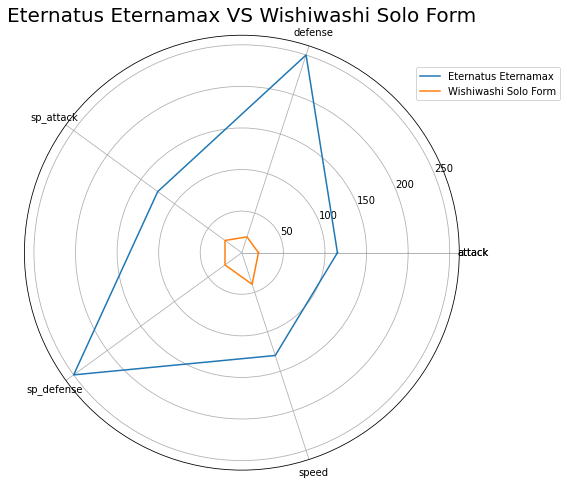

In [221]:
categories_to_query = ['name', 'total_points','attack', 'defense',
              'sp_attack', 'sp_defense', 'speed']

categories_to_show = ['attack', 'defense','sp_attack', 'sp_defense', 'speed']

# per il grafico radar, devo duplicare la prima categoria, in questo caso 'attack', e metterla al primo posto
# tutto ciò è per far chiudere il grafico
categories_to_show = [*categories_to_show, categories_to_show[0]]


best_pokemon = pd.DataFrame(filtered_pokemon_data[categories_to_query].sort_values(
    by=['total_points'], ascending=False).head(1))
best_pokemon_label = str(*list(best_pokemon['name']))


worst_pokemon = filtered_pokemon_data[categories_to_query].sort_values(
    by=['total_points'], ascending=True).head(1)
worst_pokemon_label = str(*list(worst_pokemon['name']))


my_best_pkmn_values = best_pokemon.drop(['name', 'total_points'], axis=1)
my_best_pkmn_values = list(chain(*my_best_pkmn_values.values))
my_best_pkmn_values = [*my_best_pkmn_values, my_best_pkmn_values[0]]


my_worst_pkmn_values = worst_pokemon.drop(['name', 'total_points'], axis=1)
my_worst_pkmn_values = list(chain(*my_worst_pkmn_values.values))
my_worst_pkmn_values = [*my_worst_pkmn_values, my_worst_pkmn_values[0]]



label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show), endpoint=True)
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(polar=True)
plt.plot(label_loc, my_best_pkmn_values, label=best_pokemon_label)
plt.plot(label_loc, my_worst_pkmn_values,
         label=worst_pokemon_label)
plt.title(f'{best_pokemon_label} VS {worst_pokemon_label}', size=20)
labels = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
lines = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.legend(loc=(0.9, 0.85))
plt.show()


#### Il miglior Pokèmon Leggendario a confronto con il peggiore in termini di punti statistiche

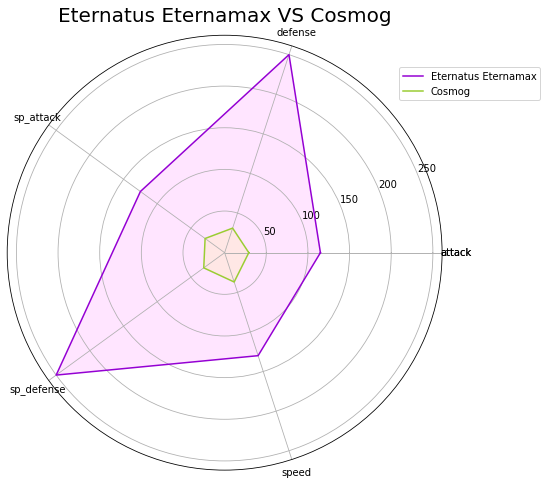

In [222]:
categories_to_query = [
    'name', 'total_points',
    'attack', 'defense',
    'sp_attack', 'sp_defense',
    'speed'
]

categories_to_show = ['attack', 'defense','sp_attack', 'sp_defense', 'speed']

# per il grafico radar, devo duplicare la prima categoria, in questo caso 'attack', e metterla al primo posto
# tutto ciò è per far chiudere il grafico
categories_to_show = [*categories_to_show, categories_to_show[0]]

my_legendary2 = pd.DataFrame(filtered_pokemon_data.groupby("status")['name'])
all_legendaries = filtered_pokemon_data[filtered_pokemon_data.status.isin(['Legendary'])]
all_legendaries_sorted = all_legendaries[categories_to_query].sort_values(by = 'total_points', ascending=False)

best_legendary = all_legendaries_sorted.head(1)
best_legendary_name = str(*list(best_legendary['name']))
best_legendary = best_legendary.drop(['name', 'total_points'], axis=1)
best_legendary = list(chain(*best_legendary.values))
# Sempre per poter "chiudere il grafico" qui non faccio altro che fare un append
# del primo valore ('attack') e lo metto come ultimo valore (chè quello, diciamo, invisibile per chiudere il grafico)
best_legendary.append(best_legendary[0])


worst_legendary = all_legendaries_sorted.tail(1)
worst_legendary_name = str(*list(worst_legendary['name']))
worst_legendary = worst_legendary.drop(['name', 'total_points'], axis=1)
worst_legendary = list(chain(*worst_legendary.values))
# Sempre per poter "chiudere il grafico" qui non faccio altro che fare un append
# del primo valore ('attack') e lo metto come ultimo valore (chè quello, diciamo, invisibile per chiudere il grafico)
worst_legendary.append(worst_legendary[0])




# Modo per disegnare il grafico
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show))
plt.figure(figsize=(8, 8))
ax2 = plt.subplot(polar=True)
ax2.plot(label_loc, best_legendary, label=best_legendary_name, color='darkviolet')
ax2.fill(label_loc, best_legendary, 'fuchsia', alpha=0.1)
ax2.plot(label_loc, worst_legendary,label=worst_legendary_name, color='yellowgreen')
ax2.fill(label_loc, worst_legendary, 'yellow', alpha=0.1)
plt.title(f'{best_legendary_name} VS {worst_legendary_name}', size=20)
line, label = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.legend(loc=(0.9, 0.85))
plt.show()

#### Miglior e Peggior Pokémon "Normale"

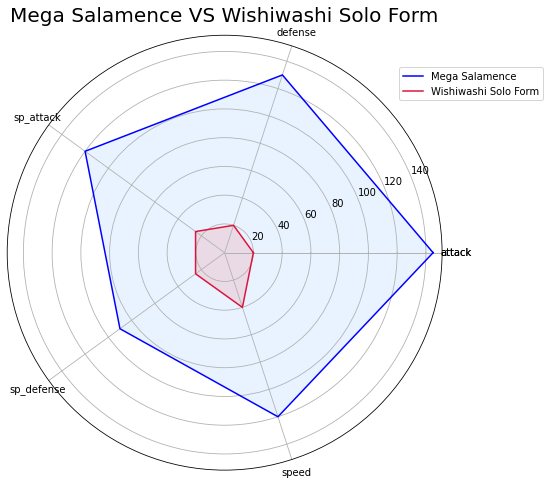

In [223]:
my_normal_pokemon = pd.DataFrame(filtered_pokemon_data.groupby("status")['name'])

all_normal = filtered_pokemon_data[filtered_pokemon_data.status.isin(['Normal'])]
all_normal_sorted = all_normal[categories_to_query].sort_values(by = 'total_points', ascending=False)


best_normal = all_normal_sorted.head(1)
best_normal_name = str(*list(best_normal['name']))
best_normal = best_normal.drop(['name', 'total_points'], axis=1)
best_normal = list(chain(*best_normal.values))
best_normal.append(best_normal[0])


worst_normal = all_normal_sorted.tail(1)
worst_normal_name = str(*list(worst_normal['name']))
worst_normal = worst_normal.drop(['name', 'total_points'], axis=1)
worst_normal = list(chain(*worst_normal.values))
worst_normal.append(worst_normal[0])


# Modo per disegnare il grafico
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show))
plt.figure(figsize=(8, 8))
ax3 = plt.subplot(polar=True)
ax3.plot(label_loc, best_normal, label=best_normal_name, color='blue')
ax3.fill(label_loc, best_normal, 'dodgerblue', alpha=0.1)
ax3.plot(label_loc, worst_normal,label=worst_normal_name, color='crimson')
ax3.fill(label_loc, worst_normal, 'red', alpha=0.1)
plt.title(f'{best_normal_name} VS {worst_normal_name}', size=20)
line_normal, label_normal = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.legend(loc=(0.9, 0.85))
plt.show()

#### Best Mythical Pokemon

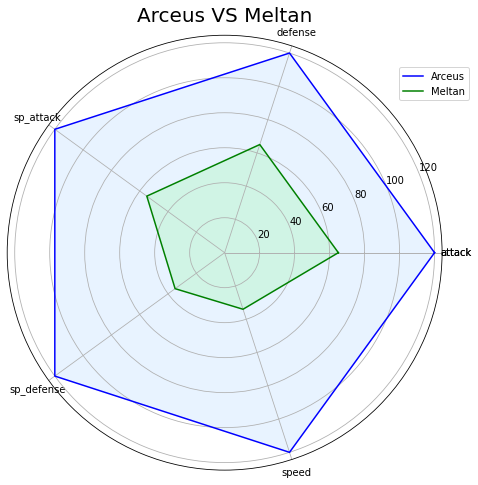

In [224]:
my_mythical_pokemon = pd.DataFrame(filtered_pokemon_data.groupby("status")['name'])

all_mythical = filtered_pokemon_data[filtered_pokemon_data.status.isin(['Mythical'])]
all_mythical_sorted = all_mythical[categories_to_query].sort_values(by = 'total_points', ascending=False)


best_mythical = all_mythical_sorted.head(1)
best_mythical_name = str(*list(best_mythical['name']))
best_mythical = best_mythical.drop(['name', 'total_points'], axis=1)
best_mythical = list(chain(*best_mythical.values))
best_mythical.append(best_mythical[0])


worst_mythical = all_mythical_sorted.tail(1)
worst_mythical_name = str(*list(worst_mythical['name']))
worst_mythical = worst_mythical.drop(['name', 'total_points'], axis=1)
worst_mythical = list(chain(*worst_mythical.values))
worst_mythical.append(worst_mythical[0])


# Modo per disegnare il grafico
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show))
plt.figure(figsize=(8, 8))
ax3 = plt.subplot(polar=True)
ax3.plot(label_loc, best_mythical, label=best_mythical_name, color='blue')
ax3.fill(label_loc, best_mythical, 'dodgerblue', alpha=0.1)
ax3.plot(label_loc, worst_mythical,label=worst_mythical_name, color='green')
ax3.fill(label_loc, worst_mythical, 'lime', alpha=0.1)
plt.title(f'{best_mythical_name} VS {worst_mythical_name}', size=20)
line_mythical, label_mythical = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.legend(loc=(0.9, 0.85))
plt.show()

#### Comparare tutti gli starter raggruppati per generazione
##### Calcoli:

In [234]:

categories_to_query_type = [
    'name', 'type_1', 'total_points',
    'attack', 'defense',
    'sp_attack', 'sp_defense',
    'speed'
]


my_generation_starter = {
    1: ['Bulbasaur', 'Squirtle', 'Charmander'],
    2: ['Chikorita', 'Totodile', 'Cyndaquil'],
    3: ['Treecko', 'Mudkip', 'Torchic'],
    4: ['Turtwig', 'Piplup', 'Chimchar'],
    5: ['Snivy', 'Oshawott', 'Tepig'],
    6: ['Chespin','Fennekin','Froakie'],
    7: ['Rowlet', 'Litten', 'Popplio'],
    8: ['Grookey', 'Scorbunny', 'Sobble']
}

starter_df= pd.DataFrame(my_generation_starter)
starter_df = starter_df.T


query_grass_starter = starter_df[0]
query_water_starter = starter_df[1]
query_fire_starter = starter_df[2]



my_filtered_df = filtered_pokemon_data[categories_to_query_type]


my_grass_starters = my_filtered_df.loc[(my_filtered_df['name'].isin(query_grass_starter.values))]
my_fire_startes = my_filtered_df.loc[(my_filtered_df['name'].isin(query_fire_starter.values))]
my_water_startes = my_filtered_df.loc[(my_filtered_df['name'].isin(query_water_starter.values))]

all_starters_merged = pd.concat([my_grass_starters, my_water_startes,
                my_fire_startes]).sort_index(kind='merge')


# ---------------------------FIRST GEN--------------------------------------------
first_gen = all_starters_merged[:3]
first_gen_name = list(chain(first_gen['name']))
first_gen = first_gen.drop(['name', 'total_points', 'type_1'], axis=1)
first_gen = list(first_gen.values)
# first_gen = [[*first_gen[0]], [*first_gen[1]], [*first_gen[2]]]
first_gen = [[*first_gen[i]] for i in range(len(first_gen))]
[first_gen[i].append(first_gen[i][0]) for i in range(len(first_gen))]
# first_gen[1].append(first_gen[0][0])
# first_gen[1].append(first_gen[1][0])
# first_gen[2].append(first_gen[2][0])
# -------------------------END FIRST GEN------------------------------------------

# ---------------------------SECOND GEN--------------------------------------------
second_gen = all_starters_merged[3:6]
second_gen_name = list(chain(second_gen['name']))
second_gen = second_gen.drop(['name', 'total_points', 'type_1'], axis=1)
second_gen = list(second_gen.values)
second_gen = [[*second_gen[i]] for i in range(len(second_gen))]
[second_gen[i].append(second_gen[i][0]) for i in range(len(second_gen))]
# -------------------------END SECOND GEN------------------------------------------


# ---------------------------THIRD GEN--------------------------------------------
third_gen = all_starters_merged[6:9]
third_gen_name = list(chain(third_gen['name']))
third_gen = third_gen.drop(['name', 'total_points', 'type_1'], axis=1)
third_gen = list(third_gen.values)
third_gen = [[*third_gen[i]] for i in range(len(third_gen))]
[third_gen[i].append(third_gen[i][0]) for i in range(len(third_gen))]

# -------------------------END THIRD GEN------------------------------------------


# ---------------------------FOURTH GEN--------------------------------------------
fourth_gen = all_starters_merged[9:12]
fourth_gen_name = list(chain(fourth_gen['name']))
fourth_gen = fourth_gen.drop(['name', 'total_points', 'type_1'], axis=1)
fourth_gen = list(fourth_gen.values)
fourth_gen = [[*fourth_gen[i]] for i in range(len(fourth_gen))]
[fourth_gen[i].append(fourth_gen[i][0]) for i in range(len(fourth_gen))]

# -------------------------END FOURTH GEN------------------------------------------

# ---------------------------FIFTH GEN--------------------------------------------
fifth_gen = all_starters_merged[12:15]
fifth_gen_name = list(chain(fifth_gen['name']))
fifth_gen = fifth_gen.drop(['name', 'total_points', 'type_1'], axis=1)
fifth_gen = list(fifth_gen.values)
fifth_gen = [[*fifth_gen[i]] for i in range(len(fifth_gen))]
[fifth_gen[i].append(fifth_gen[i][0]) for i in range(len(fifth_gen))]

# -------------------------END FIFTH GEN------------------------------------------

# ---------------------------SIXTH GEN--------------------------------------------
sixth_gen = all_starters_merged[15:18]
sixth_gen_name = list(chain(sixth_gen['name']))
sixth_gen = sixth_gen.drop(['name', 'total_points', 'type_1'], axis=1)
sixth_gen = list(sixth_gen.values)
sixth_gen = [[*sixth_gen[i]] for i in range(len(sixth_gen))]
[sixth_gen[i].append(sixth_gen[i][0]) for i in range(len(sixth_gen))]

# -------------------------END SIXTH GEN------------------------------------------

# ---------------------------SEVENTH GEN--------------------------------------------
seventh_gen = all_starters_merged[18:21]
seventh_gen_name = list(chain(seventh_gen['name']))
seventh_gen = seventh_gen.drop(['name', 'total_points', 'type_1'], axis=1)
seventh_gen = list(seventh_gen.values)
seventh_gen = [[*seventh_gen[i]] for i in range(len(seventh_gen))]
[seventh_gen[i].append(seventh_gen[i][0]) for i in range(len(seventh_gen))]

# -------------------------END SEVENTH GEN------------------------------------------

# ---------------------------EIGHTH GEN--------------------------------------------
eighth_gen = all_starters_merged.tail(3)
eighth_gen_name = list(chain(eighth_gen['name']))
eighth_gen = eighth_gen.drop(['name', 'total_points', 'type_1'], axis=1)
eighth_gen = list(eighth_gen.values)
eighth_gen = [[*eighth_gen[i]] for i in range(len(eighth_gen))]
[eighth_gen[i].append(eighth_gen[i][0]) for i in range(len(eighth_gen))]

# -------------------------END EIGHTH GEN------------------------------------------

[None, None, None]

##### Grafici

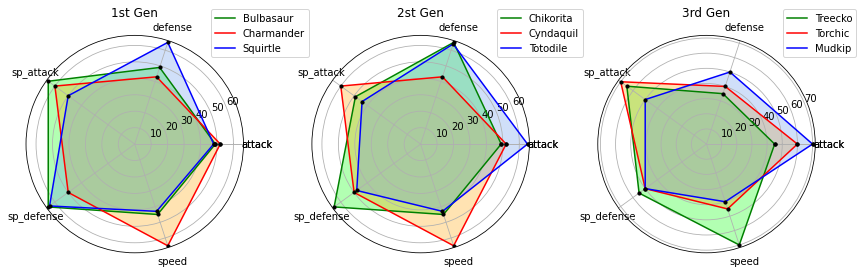

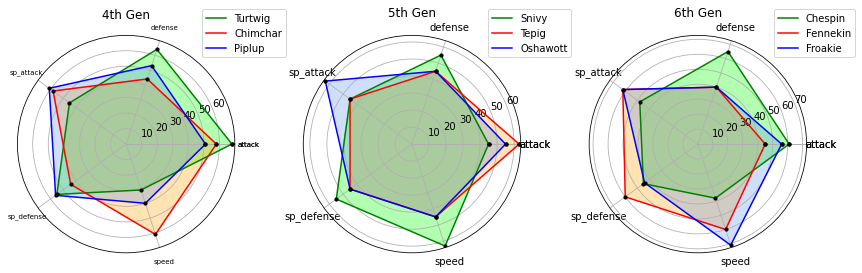

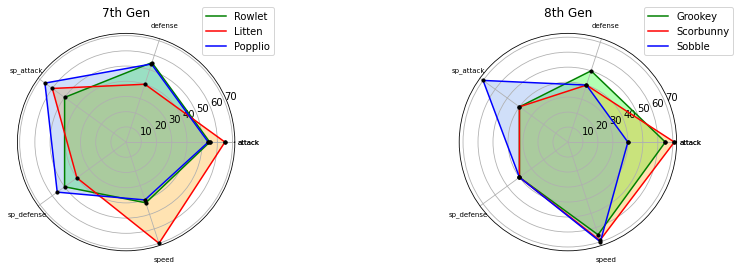

In [235]:
# ---------------------------FIRST GROUP GRAPH--------------------------------------------

fig, (ax, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='polar'))

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories_to_show))

ax.plot(label_loc, first_gen[0], label=first_gen_name[0], color='green')
ax.fill(label_loc, first_gen[0], 'lime', alpha=0.3)
ax.scatter(label_loc, first_gen[0], s=10, color='black', zorder=10)

ax.plot(label_loc, first_gen[1], label=first_gen_name[1], color='red')
ax.fill(label_loc, first_gen[1], 'orange', alpha=0.3)
ax.scatter(label_loc, first_gen[1], s=10, color='black', zorder=10)


ax.plot(label_loc, first_gen[2], label=first_gen_name[2], color='blue')
ax.fill(label_loc, first_gen[2], 'cornflowerblue', alpha=0.3)
ax.scatter(label_loc, first_gen[2], s=10, color='black', zorder=10)

ax.set_thetagrids(np.degrees(label_loc),labels=categories_to_show, fontsize=10)

ax.set_title('1st Gen')
ax.legend(loc=(0.85, 0.9), fontsize=10)



ax2.plot(label_loc, second_gen[0], label=second_gen_name[0], color='green')
ax2.fill(label_loc, second_gen[0], 'lime', alpha=0.3)
ax2.scatter(label_loc, second_gen[0], s=10, color='black', zorder=10)

ax2.plot(label_loc, second_gen[1], label=second_gen_name[1], color='red')
ax2.fill(label_loc, second_gen[1], 'orange', alpha=0.3)
ax2.scatter(label_loc, second_gen[1], s=10, color='black', zorder=10)

ax2.plot(label_loc, second_gen[2], label=second_gen_name[2], color='blue')
ax2.fill(label_loc, second_gen[2], 'cornflowerblue', alpha=0.3)
ax2.scatter(label_loc, second_gen[2], s=10, color='black', zorder=10)

ax2.set_thetagrids(np.degrees(label_loc), labels=categories_to_show, fontsize=10)
ax2.set_title('2st Gen')
ax2.legend(loc=(0.85, 0.9), fontsize=10)


ax3.plot(label_loc, third_gen[0], label=third_gen_name[0], color='green')
ax3.fill(label_loc, third_gen[0], 'lime', alpha=0.3)
ax3.scatter(label_loc, third_gen[0], s=10, color='black', zorder=10)

ax3.plot(label_loc, third_gen[1], label=third_gen_name[1], color='red')
ax3.fill(label_loc, third_gen[1], 'orange', alpha=0.3)
ax3.scatter(label_loc, third_gen[1], s=10, color='black', zorder=10)

ax3.plot(label_loc, third_gen[2], label=third_gen_name[2], color='blue')
ax3.fill(label_loc, third_gen[2], 'cornflowerblue', alpha=0.3)
ax3.scatter(label_loc, third_gen[2], s=10, color='black', zorder=10)

ax3.set_thetagrids(np.degrees(label_loc), labels=categories_to_show, fontsize=10)
ax3.set_title('3rd Gen')
ax3.legend(loc=(0.85, 0.9), fontsize=10)

fig.subplots_adjust(right=2)
# -------------------------END FIRST GROUP GRAPH------------------------------------------

# ---------------------------SECOND GROUP GRAPH--------------------------------------------
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, subplot_kw=dict(projection='polar'))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories_to_show))

ax4.plot(label_loc, fourth_gen[0], label=fourth_gen_name[0], color='green')
ax4.fill(label_loc, fourth_gen[0], 'lime', alpha=0.3)
ax4.scatter(label_loc, fourth_gen[0], s=10, color='black', zorder=10)

ax4.plot(label_loc, fourth_gen[1], label=fourth_gen_name[1], color='red')
ax4.fill(label_loc, fourth_gen[1], 'orange', alpha=0.3)
ax4.scatter(label_loc, fourth_gen[1], s=10, color='black', zorder=10)

ax4.plot(label_loc, fourth_gen[2], label=fourth_gen_name[2], color='blue')
ax4.fill(label_loc, fourth_gen[2], 'cornflowerblue', alpha=0.3)
ax4.scatter(label_loc, fourth_gen[2], s=10, color='black', zorder=10)

ax4.set_thetagrids(np.degrees(label_loc),labels=categories_to_show, fontsize=7)
ax4.set_title('4th Gen')
ax4.legend(loc=(0.85, 0.9), fontsize=10)

ax5.plot(label_loc, fifth_gen[0], label=fifth_gen_name[0], color='green')
ax5.fill(label_loc, fifth_gen[0], 'lime', alpha=0.3)
ax5.scatter(label_loc, fifth_gen[0], s=10, color='black', zorder=10)

ax5.plot(label_loc, fifth_gen[1], label=fifth_gen_name[1], color='red')
ax5.fill(label_loc, fifth_gen[1], 'orange', alpha=0.3)
ax5.scatter(label_loc, fifth_gen[1], s=10, color='black', zorder=10)

ax5.plot(label_loc, fifth_gen[2], label=fifth_gen_name[2], color='blue')
ax5.fill(label_loc, fifth_gen[2], 'cornflowerblue', alpha=0.3)
ax5.scatter(label_loc, fifth_gen[2], s=10, color='black', zorder=10)

ax5.set_thetagrids(np.degrees(label_loc),labels=categories_to_show, fontsize=10)
ax5.set_title('5th Gen')
ax5.legend(loc=(0.85, 0.9), fontsize=10)

ax6.plot(label_loc, sixth_gen[0], label=sixth_gen_name[0], color='green')
ax6.fill(label_loc, sixth_gen[0], 'lime', alpha=0.3)
ax6.scatter(label_loc, sixth_gen[0], s=10, color='black', zorder=10)

ax6.plot(label_loc, sixth_gen[1], label=sixth_gen_name[1], color='red')
ax6.fill(label_loc, sixth_gen[1], 'orange', alpha=0.3)
ax6.scatter(label_loc, sixth_gen[1], s=10, color='black', zorder=10)

ax6.plot(label_loc, sixth_gen[2], label=sixth_gen_name[2], color='blue')
ax6.fill(label_loc, sixth_gen[2], 'cornflowerblue', alpha=0.3)
ax6.scatter(label_loc, sixth_gen[2], s=10, color='black', zorder=10)

ax6.set_thetagrids(np.degrees(label_loc),labels=categories_to_show, fontsize=10)
ax6.set_title('6th Gen')
ax6.legend(loc=(0.85, 0.9), fontsize=10)


fig.subplots_adjust(right=2)
# ---------------------------END SECOND GROUPED GRAPH-----------------------------------------

# -------------------------------THIRD GROUP GRAPH--------------------------------------------

fig, (ax7, ax8) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories_to_show))

ax7.plot(label_loc, seventh_gen[0], label=seventh_gen_name[0], color='green')
ax7.fill(label_loc, seventh_gen[0], 'lime', alpha=0.3)
ax7.scatter(label_loc, seventh_gen[0], s=10, color='black', zorder=10)

ax7.plot(label_loc, seventh_gen[1], label=seventh_gen_name[1], color='red')
ax7.fill(label_loc, seventh_gen[1], 'orange', alpha=0.3)
ax7.scatter(label_loc, seventh_gen[1], s=10, color='black', zorder=10)

ax7.plot(label_loc, seventh_gen[2], label=seventh_gen_name[2], color='blue')
ax7.fill(label_loc, seventh_gen[2], 'cornflowerblue', alpha=0.3)
ax7.scatter(label_loc, seventh_gen[2], s=10, color='black', zorder=10)

ax7.set_thetagrids(np.degrees(label_loc),labels=categories_to_show, fontsize=7)
ax7.set_title('7th Gen')
ax7.legend(loc=(0.85, 0.9), fontsize=10)

ax8.plot(label_loc, eighth_gen[0], label=eighth_gen_name[0], color='green')
ax8.fill(label_loc, eighth_gen[0], 'lime', alpha=0.3)
ax8.scatter(label_loc, eighth_gen[0], s=10, color='black', zorder=10)

ax8.plot(label_loc, eighth_gen[1], label=eighth_gen_name[1], color='red')
ax8.fill(label_loc, eighth_gen[1], 'orange', alpha=0.3)
ax8.scatter(label_loc, eighth_gen[1], s=10, color='black', zorder=10)

ax8.plot(label_loc, eighth_gen[2], label=eighth_gen_name[2], color='blue')
ax8.fill(label_loc, eighth_gen[2], 'cornflowerblue', alpha=0.3)
ax8.scatter(label_loc, eighth_gen[2], s=10, color='black', zorder=10)

ax8.set_thetagrids(np.degrees(label_loc),labels=categories_to_show, fontsize=7)
ax8.set_title('8th Gen')
ax8.legend(loc=(0.85, 0.9), fontsize=10)


fig.subplots_adjust(right=2)